# Sampling with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()


In [4]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data 

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


### Compute the sample mean

In [5]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

##### sample mean based on another random sample of 50 districts. 

In [6]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

74.24780000000001

## The central limit theorem 

**central limit theorem** tells that when the sample size is large enough, the sample mean approaches a normal distribution.

### Computing the mean of a sampling distribution with 10,000 samples

In [7]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [9]:
estimate_df

,estimate
0,72.6732
1,72.2458
2,74.1392
3,72.7730
4,73.9434
...,...
9995,72.1510
9996,72.7130
9997,74.9084
9998,72.9600


In [8]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.39204761999977

In [10]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444797

The mean of our sampling distribution is identical to the population mean, which is also about 73.4%! 

### Visualizing means


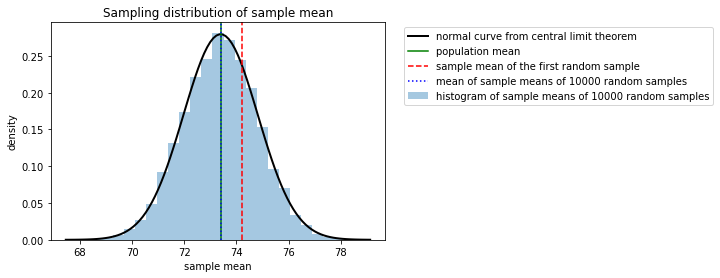

In [11]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

There are three key takeaways from this graph:

1.  As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
2. The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.  
3. The sample mean of our first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability. 
